In [2]:
import numpy as np
import pandas as pd
from collections import Counter

def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df

def exploratory_data_analysis(df):
    print("\nFirst 5 rows of the dataset:\n", df.head())
    print("\nDataset Info:\n")
    print(df.info())
    print("\nSummary Statistics:\n", df.describe())
    print("\nMissing Values:\n", df.isnull().sum())

def handle_missing_data(df):
    return df.dropna()

def train_test_split(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _predict_single(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

if __name__ == "__main__":
    file_path = "/content/drive/MyDrive/diabetes.csv"

    df = load_dataset(file_path)
    exploratory_data_analysis(df)

    df = handle_missing_data(df)

    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    knn = KNNClassifier(k=3)
    knn.fit(X_train, y_train)

    accuracy = knn.score(X_test, y_test)
    print(f"\nAccuracy of KNN classifier: {accuracy:.2f}")



First 5 rows of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-nul

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from collections import Counter
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df

def exploratory_data_analysis(df):
    print("\nFirst 5 rows of the dataset:\n", df.head())
    print("\nDataset Info:\n")
    print(df.info())
    print("\nSummary Statistics:\n", df.describe())
    print("\nMissing Values:\n", df.isnull().sum())

def handle_missing_data(df):
    return df.dropna()

def train_test_split(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _predict_single(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

if __name__ == "__main__":
    file_path = "/content/drive/MyDrive/diabetes.csv"
    df = load_dataset(file_path)
    exploratory_data_analysis(df)

    df = handle_missing_data(df)

    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    knn_original = KNNClassifier(k=3)
    knn_original.fit(X_train, y_train)
    accuracy_original = knn_original.score(X_test, y_test)
    print(f"Accuracy of kNN on original (unscaled) data: {accuracy_original:.2f}")

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn_scaled = KNNClassifier(k=3)
    knn_scaled.fit(X_train_scaled, y_train)
    accuracy_scaled = knn_scaled.score(X_test_scaled, y_test)
    print(f"Accuracy of kNN on scaled data: {accuracy_scaled:.2f}")

    print("\nComparative Analysis:")
    print(f"Accuracy on original data: {accuracy_original:.2f}")
    print(f"Accuracy on scaled data: {accuracy_scaled:.2f}")

    if accuracy_scaled > accuracy_original:
        print("\nScaling improved the performance because it prevents features with larger ranges from dominating the distance metric.")
    elif accuracy_scaled < accuracy_original:
        print("\nScaling decreased the performance, possibly due to features already being on similar scales.")
    else:
        print("\nScaling had no impact on the performance, possibly due to features already being normalized or on similar scales.")



First 5 rows of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-nul

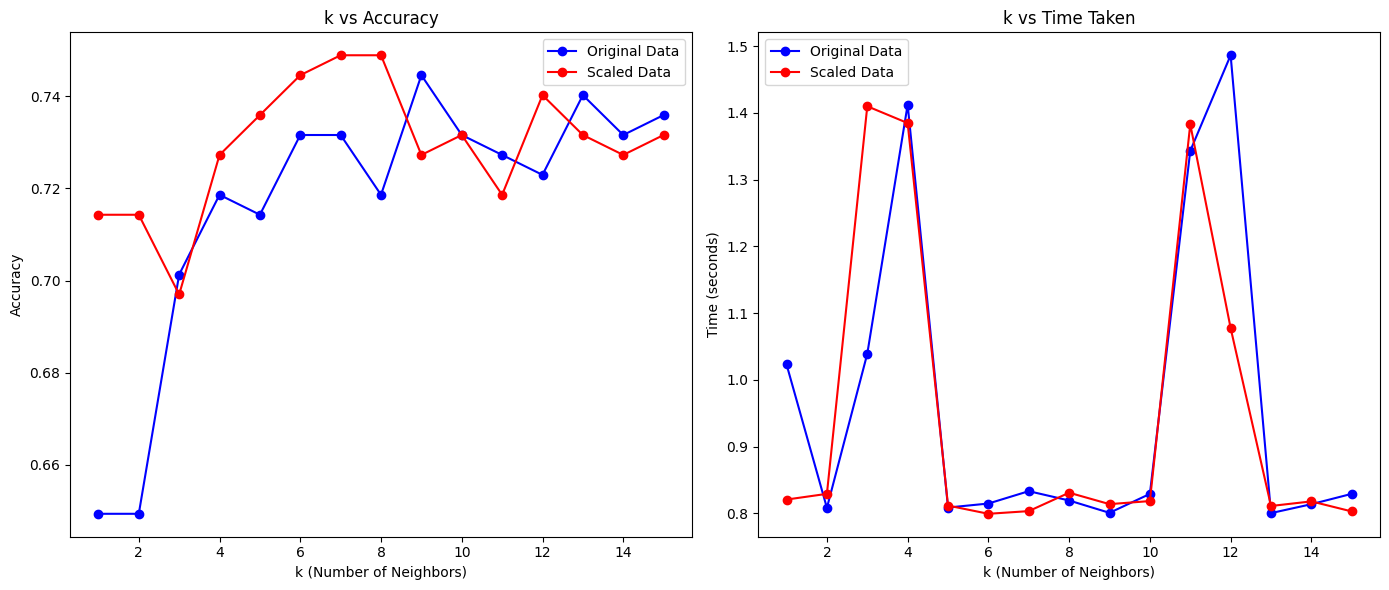

Optimal k for original data: 9 with accuracy 0.74
Optimal k for scaled data: 7 with accuracy 0.75

Analysis and Discussion:
Scaling improved the accuracy by making the features contribute equally to the distance metric.

Time Analysis:
At optimal k for original data, time taken: 0.8007264137268066 seconds
At optimal k for scaled data, time taken: 0.8033027648925781 seconds
Increasing k increases the computation cost (time) due to more distance calculations.


In [4]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter

def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df
def handle_missing_data(df):
    return df.dropna()
def train_test_split(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _predict_single(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

if __name__ == "__main__":
    file_path = "/content/drive/MyDrive/diabetes.csv"
    df = load_dataset(file_path)
    df = handle_missing_data(df)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    k_values = range(1, 16)
    accuracy_original = []
    accuracy_scaled = []
    time_original = []
    time_scaled = []
    for k in k_values:
        knn_original = KNNClassifier(k=k)
        knn_original.fit(X_train, y_train)

        start_time = time.time()
        accuracy_original.append(knn_original.score(X_test, y_test))
        time_original.append(time.time() - start_time)

        knn_scaled = KNNClassifier(k=k)
        knn_scaled.fit(X_train_scaled, y_train)

        start_time = time.time()
        accuracy_scaled.append(knn_scaled.score(X_test_scaled, y_test))
        time_scaled.append(time.time() - start_time)

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, accuracy_original, label='Original Data', color='blue', marker='o')
    plt.plot(k_values, accuracy_scaled, label='Scaled Data', color='red', marker='o')
    plt.title("k vs Accuracy")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(k_values, time_original, label='Original Data', color='blue', marker='o')
    plt.plot(k_values, time_scaled, label='Scaled Data', color='red', marker='o')
    plt.title("k vs Time Taken")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Time (seconds)")
    plt.legend()

    plt.tight_layout()
    plt.show()

    optimal_k_original = k_values[np.argmax(accuracy_original)]
    optimal_k_scaled = k_values[np.argmax(accuracy_scaled)]

    print(f"Optimal k for original data: {optimal_k_original} with accuracy {max(accuracy_original):.2f}")
    print(f"Optimal k for scaled data: {optimal_k_scaled} with accuracy {max(accuracy_scaled):.2f}")
    print("\nAnalysis and Discussion:")
    if max(accuracy_scaled) > max(accuracy_original):
        print("Scaling improved the accuracy by making the features contribute equally to the distance metric.")
    elif max(accuracy_scaled) < max(accuracy_original):
        print("Scaling did not improve performance, possibly because the original data had similar feature scales.")
    else:
        print("Scaling had no impact on the performance, as the feature ranges were already similar.")

    print("\nTime Analysis:")
    print(f"At optimal k for original data, time taken: {time_original[np.argmax(accuracy_original)]} seconds")
    print(f"At optimal k for scaled data, time taken: {time_scaled[np.argmax(accuracy_scaled)]} seconds")
    print("Increasing k increases the computation cost (time) due to more distance calculations.")
